In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/kdd-cup-1999-data/kddcup.data.gz', compression='gzip',header=None )

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [4]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41],
      dtype='int64')

In [5]:
df.drop(df.iloc[:,:4],axis=1,inplace=True)

In [6]:
df.head()

,4,5,6,7,8,9,10,11,12,13,...,32,33,34,35,36,37,38,39,40,41
0,215,45076,0,0,0,0,0,1,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,162,4528,0,0,0,0,0,1,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,236,1228,0,0,0,0,0,1,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,233,2032,0,0,0,0,0,1,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,239,486,0,0,0,0,0,1,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df[41].value_counts()

41
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [12]:
df[41].replace({'smurf.': 0,'neptune.':1, 'normal.':2,'satan.':3, 'ipsweep.':4,
                'portsweep.':5, 'nmap.':6, 'back.':6 ,'warezclient.':6 , 'teardrop.':6 ,
                'pod.':6 , 'guess_passwd.':6 , 'buffer_overflow.':6 ,'land.':6 ,
                'warezmaster.':6 ,'imap.':6 , 'rootkit.':6 ,'loadmodule.':6 ,
                'ftp_write.':6 ,'multihop.':6 ,
                'phf.':6 , 'perl.':6 , 'spy.':6 },inplace=True)
df[41].value_counts()

/tmp/ipykernel_33/1042334231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[41].replace({'smurf.': 0,'neptune.':1, 'normal.':2,'satan.':3, 'ipsweep.':4,
/tmp/ipykernel_33/1042334231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[41].replace({'smurf.': 0,'neptune.':1, 'normal.':2,'sat

41
0    2807886
1    1072017
2     972781
3      15892
4      12481
5      10413
6       6961
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 38 columns):
 #   Column  Dtype  
---  ------  -----  
 0   4       int64  
 1   5       int64  
 2   6       int64  
 3   7       int64  
 4   8       int64  
 5   9       int64  
 6   10      int64  
 7   11      int64  
 8   12      int64  
 9   13      int64  
 10  14      int64  
 11  15      int64  
 12  16      int64  
 13  17      int64  
 14  18      int64  
 15  19      int64  
 16  20      int64  
 17  21      int64  
 18  22      int64  
 19  23      int64  
 20  24      float64
 21  25      float64
 22  26      float64
 23  27      float64
 24  28      float64
 25  29      float64
 26  30      float64
 27  31      int64  
 28  32      int64  
 29  33      float64
 30  34      float64
 31  35      float64
 32  36      float64
 33  37      float64
 34  38      float64
 35  39      float64
 36  40      float64
 37  41      int64  
dtypes: float64(15), int64(23)
memory usage: 1.

In [14]:
df.describe()

,4,5,6,7,8,9,10,11,12,13,...,32,33,34,35,36,37,38,39,40,41
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,...,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02,6.551098e-01
std,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,...,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01,8.708104e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,1.000000e+00,...,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


/tmp/ipykernel_33/4191100140.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


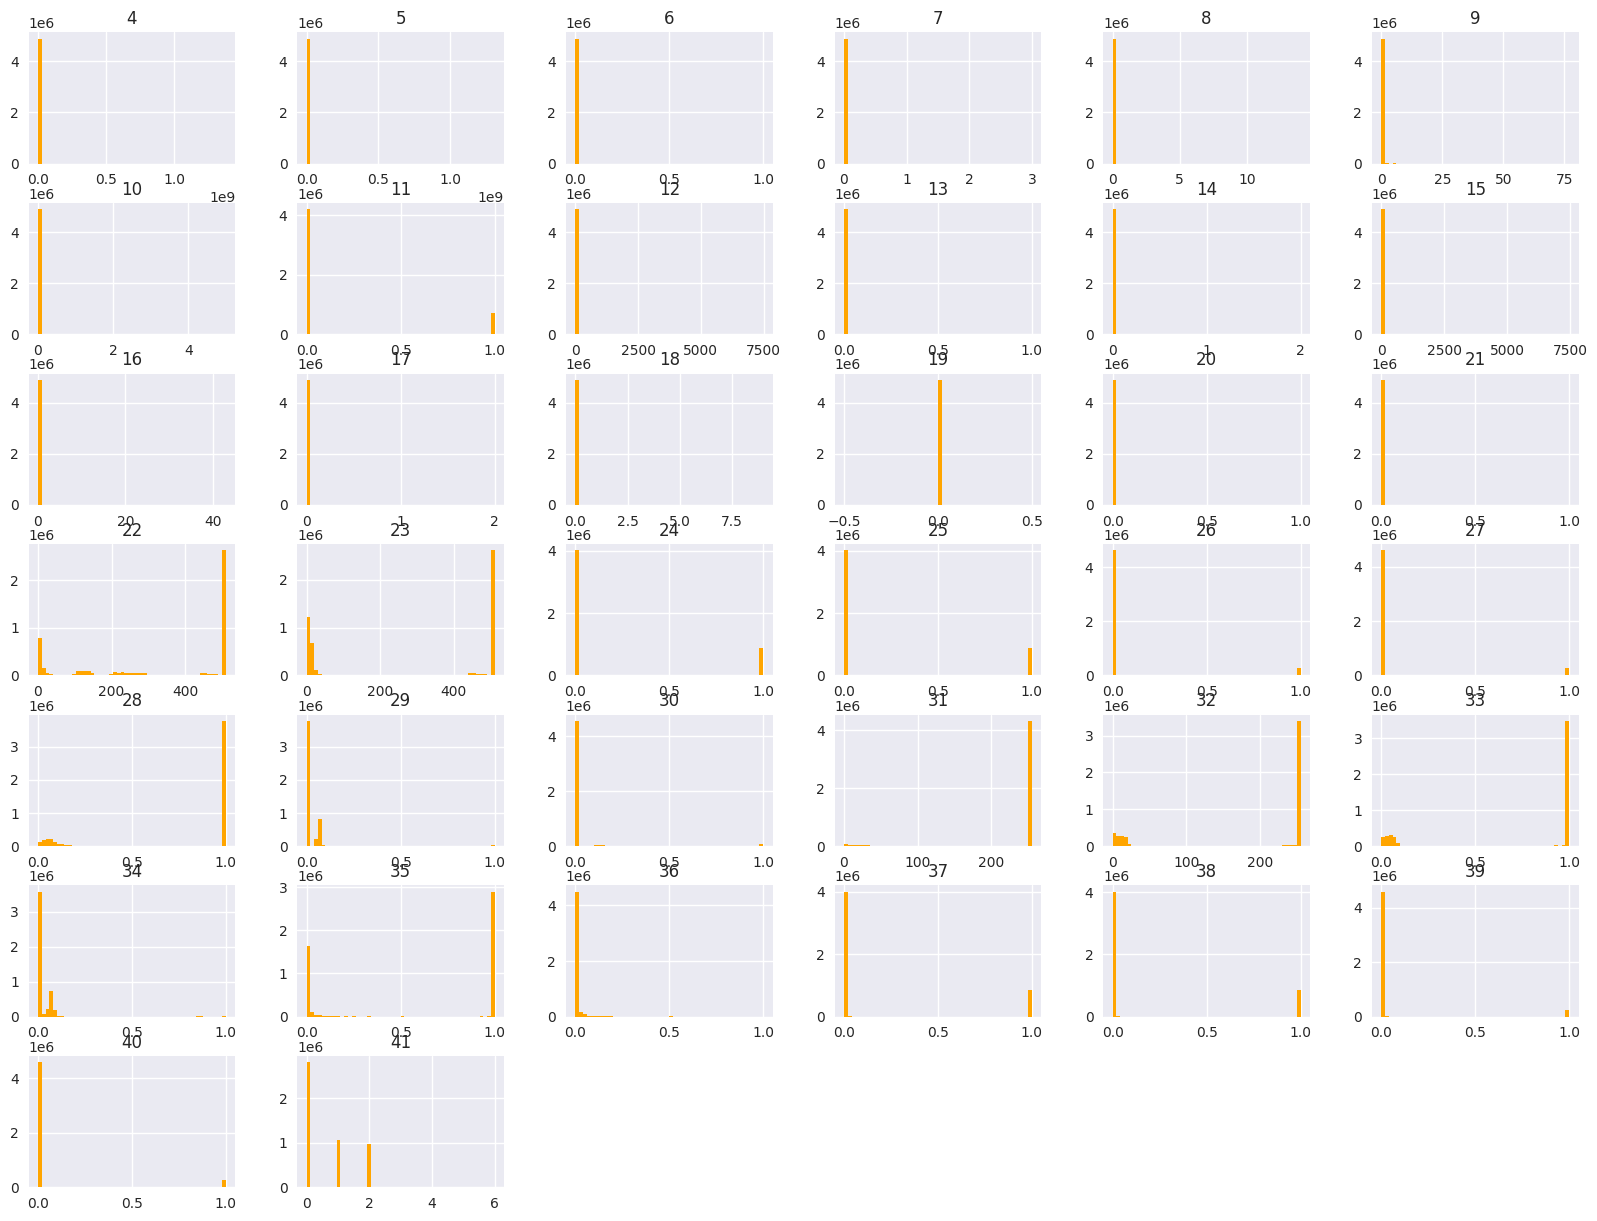

In [15]:
## Plot desnity plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [16]:
df.head()

,4,5,6,7,8,9,10,11,12,13,...,32,33,34,35,36,37,38,39,40,41
0,215,45076,0,0,0,0,0,1,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2
1,162,4528,0,0,0,0,0,1,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,2
2,236,1228,0,0,0,0,0,1,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,2
3,233,2032,0,0,0,0,0,1,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,2
4,239,486,0,0,0,0,0,1,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,2


In [17]:
df.columns

Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41],
      dtype='int64')

In [23]:
X= df.iloc[:,:37]
y=df[41]

In [26]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,random_state=2529)

In [28]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Index: 3673823 entries, 3486024 to 3535588
Data columns (total 37 columns):
 #   Column  Dtype  
---  ------  -----  
 0   4       int64  
 1   5       int64  
 2   6       int64  
 3   7       int64  
 4   8       int64  
 5   9       int64  
 6   10      int64  
 7   11      int64  
 8   12      int64  
 9   13      int64  
 10  14      int64  
 11  15      int64  
 12  16      int64  
 13  17      int64  
 14  18      int64  
 15  19      int64  
 16  20      int64  
 17  21      int64  
 18  22      int64  
 19  23      int64  
 20  24      float64
 21  25      float64
 22  26      float64
 23  27      float64
 24  28      float64
 25  29      float64
 26  30      float64
 27  31      int64  
 28  32      int64  
 29  33      float64
 30  34      float64
 31  35      float64
 32  36      float64
 33  37      float64
 34  38      float64
 35  39      float64
 36  40      float64
dtypes: float64(15), int64(22)
memory usage: 1.0 GB


In [30]:
pd.DataFrame(y_train).value_counts()

41
0     2106524
1      803782
2      729121
3       11984
4        9312
5        7881
6        5219
Name: count, dtype: int64

In [31]:
pd.DataFrame(y_test).value_counts()

41
0     701362
1     268235
2     243660
3       3908
4       3169
5       2532
6       1742
Name: count, dtype: int64

In [32]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [34]:
corr_features

{15, 21, 23, 25, 27, 28, 32, 33, 35, 37, 38, 39, 40}

In [35]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((3673823, 24), (1224608, 24))

/tmp/ipykernel_33/2759848313.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


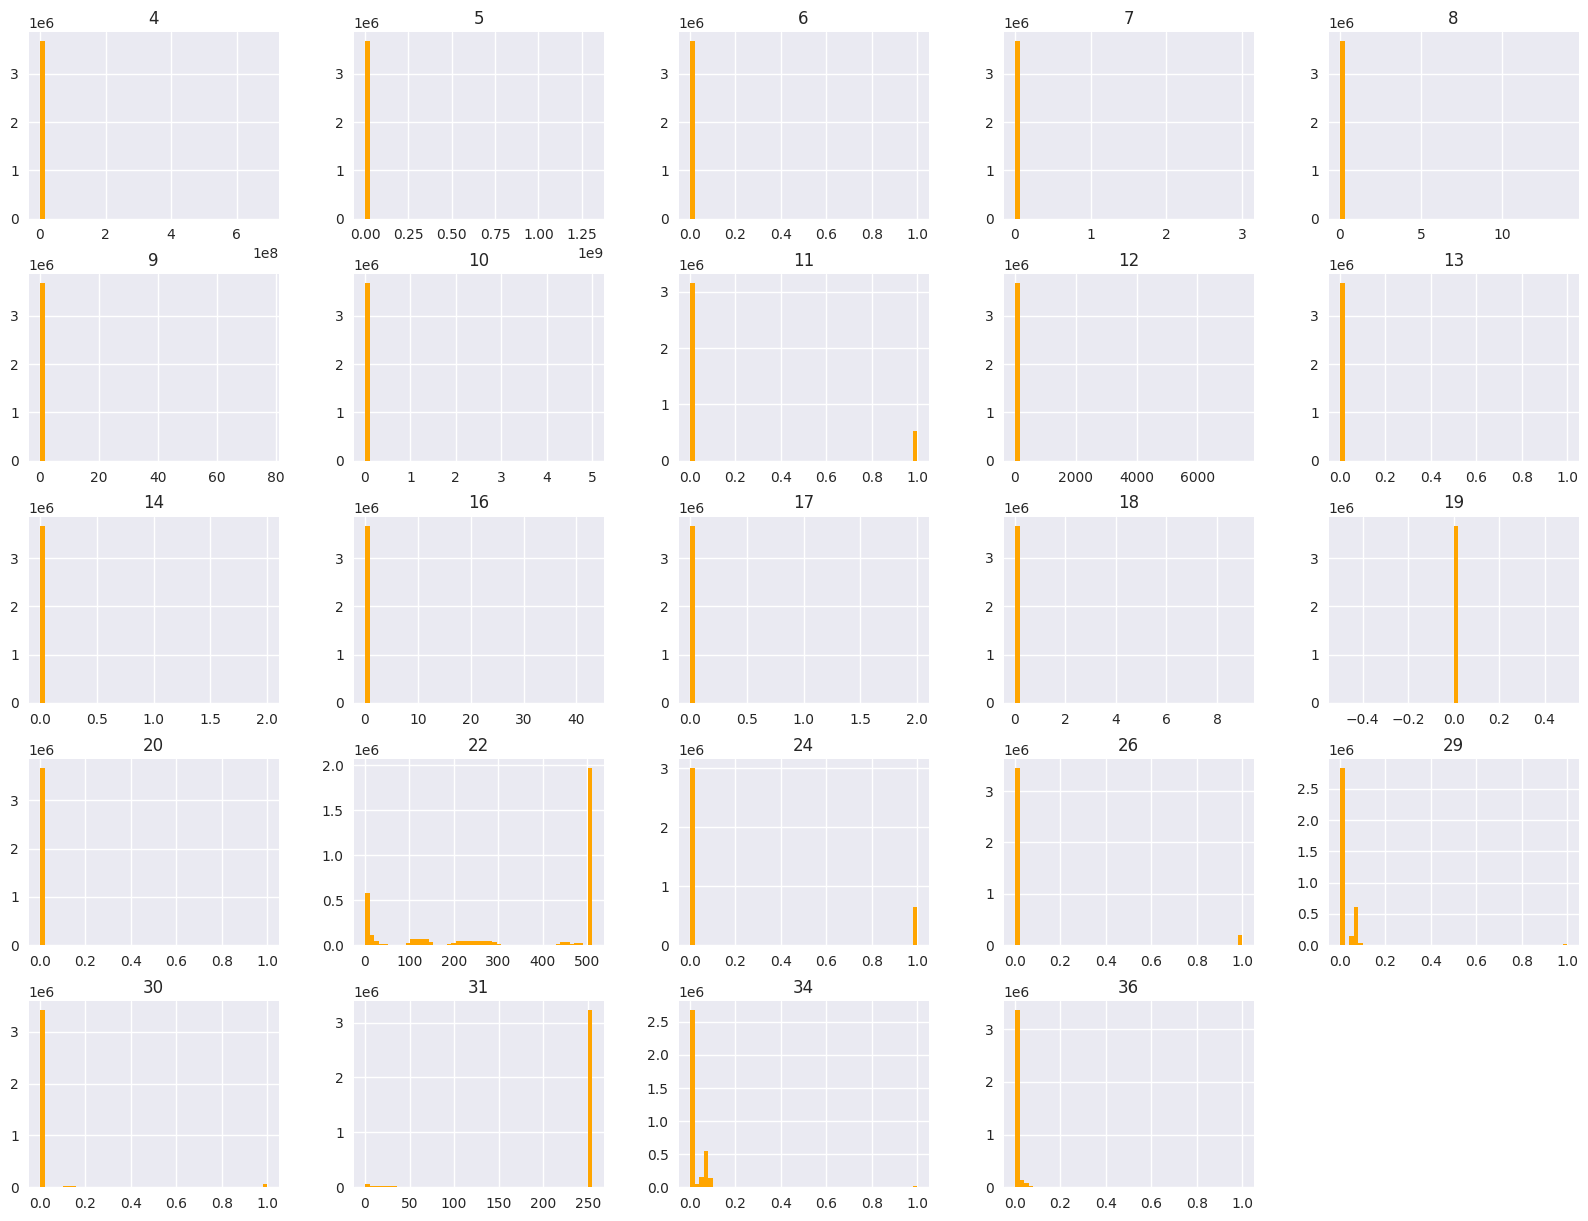

In [37]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier(),
    "Xgboost": XGBClassifier(),
    "Gaussian": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

# Assuming y_train and y_test are multi-class, you may need to binarize them for ROC AUC
y_train_binarized = label_binarize(y_train, classes=list(set(y_train)))
y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train_binarized, model.predict_proba(X_train), multi_class='ovr')

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test_binarized, model.predict_proba(X_test), multi_class='ovr')

    # Print performance
    print(name)
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score:.4f}")
    print('='*35)
    print('\n')


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Logistic Regression
Model performance for Training set
- Accuracy: 0.9615
- F1 score: 0.9570
- Precision: 0.9568
- Recall: 0.9615
- Roc Auc Score: 0.9110
----------------------------------
Model performance for Test set
- Accuracy: 0.9617
- F1 score: 0.9572
- Precision: 0.9572
- Recall: 0.9617
- Roc Auc Score: 0.9105


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- Roc Auc Score: 0.9987


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- Roc Auc Score: 0.9998


Gradient Boost
Model performance for Training set